<a href="https://colab.research.google.com/github/ywan1416/MAT421/blob/main/Module_D_Section_1_1%2C_1_2%2C_1_3_and_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra

Linear space: as a vector space, is a fundamental concept in linear algebra. It is a set of vectors that is closed under two operations: vector addition and scalar multiplication. These operations must satisfy a set of eight axioms, ensuring properties such as associativity, commutativity, the existence of a zero vector, and the existence of additive inverses. Additionally, scalar multiplication must be distributive and associative with respect to real numbers (or elements from a given field). A vector space provides the foundational structure for various mathematical and applied disciplines, including geometry, physics, and data science.

Orthogonality describes a special relationship between vectors in a vector space. Two vectors are said to be orthogonal if their inner product (or dot product) is equal to zero. This means that the vectors are perpendicular to each other in Euclidean space. Orthogonality is a crucial concept in linear algebra, playing a key role in areas such as orthonormal bases, projections, and matrix decompositions. It is widely used in applications like signal processing, machine learning, and numerical analysis, where orthogonal transformations simplify computations and preserve vector norms.

Eigenvalues are an important concept associated with square matrices in linear algebra. Given a square matrix \( A \), a scalar \( \lambda \) is called an eigenvalue of \( A \) if there exists a nonzero vector \( x \) such that:

\[
Ax = \lambda x
\]

Here, \( x \) is known as the eigenvector corresponding to the eigenvalue \( \lambda \).


# 1.2.1 Linear spaces

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import random
from IPython.display import display, Image

1.2.1.1 Linear Combinations

*   linear combinations in vectors

In [ ]:
# Generate a random integer vector A of length 3 with values between 1 and 10
A = np.random.randint(1, 10, 3)
print(A)

B = np.random.randint(1, 10, 3)
print(B)

C = np.random.randint(1, 10, 3)
print(C)

[2 2 7]
[8 5 2]
[1 1 6]


In [ ]:
# Generate a random integer number
x1 = random.randint(1,10)
y1 = random.randint(1,10)
z1 = random.randint(1,10)

#Get the Linear Combination of Vector A, B and C
Com = x1*A+y1*B+z1*C

print("Linear Combination of Vector A,B an d C is", Com)

Linear Combination of Vector A,B an d C is [22 19 61]


1.2.1.2 Linear dependence and independence

In [ ]:
# Put A, B, C in a matrix
matrix_np = np.column_stack([A, B, C])

# Convert the numpy matrix to a sympy matrix
matrix_sp = sp.Matrix(matrix_np)

# Compute the RREF using sympy
rref_matrix, pivot_columns = matrix_sp.rref()

print("The RREF of the matrix is:")
sp.pprint(rref_matrix)

#Determine dependence or indepence
if len(pivot_columns) == matrix_sp.shape[1]:
    print("The vectors are linearly independent.")
else:
    print("The vectors are linearly dependent.")



The RREF of the matrix is:
⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦
The vectors are linearly independent.


# 1.2.2 Orthogonality

1.2.2.1 Orthonormal Bases


*   Orthonormal Basis



In [ ]:
#get the dot product of A, B, C
dot_product1 = np.dot(A, B)
dot_product2 = np.dot(A, C)
dot_product3 = np.dot(B, C)

#get the norm of A, B, C
normA = np.linalg.norm(A)
normB = np.linalg.norm(B)
normC = np.linalg.norm(B)

#determine if they are orthogonality
if dot_product1 == 0 and normA == 1 and normB == 1:
    print(f"The vectors are orthogonality.")
    print(f"Norm of A and B are 1.")
else:
    print("Dot product of A and B:", dot_product1)

if dot_product2 == 0 and normA == 1 and normC == 1:
    print(f"The vectors are orthogonality.")
    print(f"Norm of A and C are 1.")
else:
    print("Dot product of A and C:", dot_product2)

if dot_product3 == 0 and normB == 1 and normC == 1:
    print(f"The vectors are orthogonality.")
    print(f"Norm of B and C are 1.")
else:
    print("Dot product of B and C:", dot_product3)

Dot product of A and B: 40
Dot product of A and C: 46
Dot product of B and C: 25


1.2.2.2 Best Approximation Theorem

In [ ]:
def project(u1, v):
    """
    Project vector u onto v
    :param u: Vector u
    :param v: Vector v
    :return:
    """
    return np.multiply((np.dot(u1, v) / np.dot(u1, u1)), u1)

In [ ]:
# Generate a vector v
v = np.array([2, 4])

# Generate a subspace U spanned by u1
u1 = np.array([2, 7])

# Make u1 a unit vector
u1_normalized = u1 / np.linalg.norm(u1)

# Calculate the approximation
v_star = project(u1_normalized, v)

print(f"Vector v:",v)
print(f"Subspace U:",u1)
print(f"Best approximation v* :", v_star)


Vector v: [2 4]
Subspace U: [2 7]
Best approximation v* : [1.20754717 4.22641509]


# 1.2.3. Gram–Schmidt process

In [ ]:

# Get the a basis vector
gs_A = A / np.linalg.norm(A)

# Subtract the projection made the orthogonal
proj_q = np.dot(B, gs_A) * gs_A
b2 = B - proj_q

# Get the other basis vector
gs_B = b2 / np.linalg.norm(b2)

print(f"Gram-Schmidt Matrix of A:", gs_A)
print(f"Gram-Schmidt Matrix of B:", gs_B)


Gram-Schmidt Matrix of A: [0.26490647 0.26490647 0.92717265]
Gram-Schmidt Matrix of B: [ 0.81863607  0.44633083 -0.36141911]


# 1.2.4. Eigenvalues and eigenvectors

In [ ]:
def generate_random_matrix(size: int = 3):
    """
    Generates Random Square Matrix of given Size with Integers (0-99)
    """
    return np.random.randint(0, 100, [size, size])

In [ ]:
matrix_size = 3

# Generate a random 3x3 Matrix A
A = generate_random_matrix(matrix_size)
print("Random 3x3 Matrix A:\n", A)

#Get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f"Eigenvalues of Matrix A:",eigenvalues)
print(f"Eigenvectors of Matrix A:",eigenvectors)

Random 3x3 Matrix A:
 [[41 28  3]
 [69 32  6]
 [28 35 26]]
Eigenvalues of Matrix A: [85.34691771 -8.26816503 21.92124732]
Eigenvectors of Matrix A: [[-0.45509693 -0.41753531 -0.07882992]
 [-0.65631462  0.7839175  -0.05294524]
 [-0.60177895 -0.45949714  0.99548111]]


# 1.3.1. QR decomposition

In [3]:
# Generate a random integer vector A, B of length 3 with values between 1 and 10
A = np.random.randint(1, 10, 3)
print(A)

B = np.random.randint(1, 10, 3)
print(B)

[1 8 1]
[8 1 4]


In [4]:
# Put A, B, C in a matrix
matrix_x = np.column_stack([A, B])

# Calculate the Orthogonal matrix (Q) and Upper triangular matrix (R)
Q, R = np.linalg.qr(matrix_x)

print("Orthogonal matrix of matrix X:\n",Q,"\n")
print("Upper triangular matrix of matrix X:\n",R)

Orthogonal matrix of matrix X:
 [[-0.12309149  0.88912882]
 [-0.98473193 -0.16452384]
 [-0.12309149  0.42706188]] 

Upper triangular matrix of matrix X:
 [[-8.1240384  -2.46182982]
 [ 0.          8.65675424]]


# 1.3.2. Least-squares problems


*   Using Normal Equations


In [ ]:
# get a b using matrix x
b = np.dot(matrix_x, np.random.rand(2))
print("Vector b:\n",b)

# Calculate martix X^T*X
X_T_X = np.dot(matrix_x.T,matrix_x)
print("X^T*X:\n",X_T_X)

# Calculate matrix X^T * b
X_T_b = np.dot(matrix_x.T,b)
print("X^T*b:\n",X_T_b)

# Calculate the Least-squares solution
ls_1 = np.linalg.solve(X_T_X, X_T_b)

print("\nLeast-squares solution of matrix x using normal equation:\n",ls)


Vector b:
 [4.32266691 7.72675152 2.88177794]
X^T*X:
 [[101  89]
 [ 89  94]]
X^T*b:
 [91.5503739  88.27232033]

Least-squares solution of matrix x using normal equation:
 [0.6272272  0.64108724]



*   Using QR Decomposition



In [ ]:
#Calculate Q^T*b
Q_T_b = np.dot(Q.T, b)
ls_2 = np.linalg.solve(R, Q_T_b)

print("\nLeast-squares solution of matrix x using QR Decomposition:\n",ls)


Least-squares solution of matrix x using QR Decomposition:
 [0.6272272  0.64108724]


# 1.3.3. Linear regression

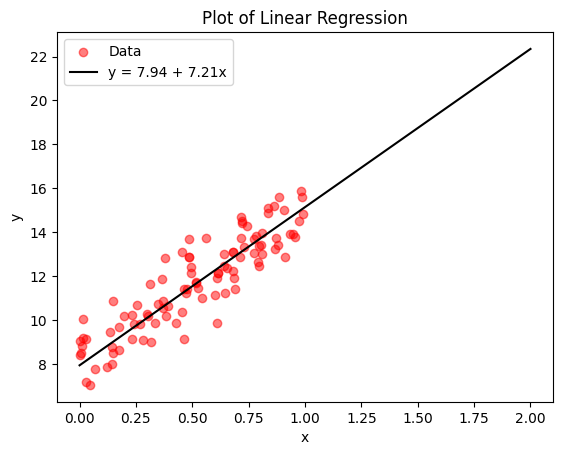

In [ ]:
# Generate a random integer array beta of length n with values between 1 and 10
beta = np.random.uniform(1, 10, 2)

# Get random x value
x = np.random.rand(100)

# Get the actual y line
y_line = round(beta[0])+round(beta[1])*x
y = y_line + np.random.randn(100)

# Made the predicition x value
x_pred = np.linspace(0, 2, 100)

# Prediciton y value by beta
y_pred = beta[0] + beta[1] * x_pred

# Made the linear regression plot
plt.scatter(x, y, label="Data", alpha=0.5, color = "red")
plt.plot(x_pred, y_pred, label=f"y = {beta[0]:.2f} + {beta[1]:.2f}x", color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of Linear Regression")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import random
from IPython.display import display, Image

# 1.4.1. Singular value decomposition

In [ ]:
# Generate a random integer vector A of length 3 with values between 1 and 10
A = np.random.randint(1, 10, 3)
print(A)

B = np.random.randint(1, 10, 3)
print(B)

[4 6 3]
[8 1 6]


In [ ]:
# Put A, B in a matrix
matrix_x = np.column_stack([A, B])

# Calculate martix X^T*X
X_T_X = np.dot(matrix_x, matrix_x.T)
print("X^T*X:\n",X_T_X)

# Calculate martix X^T*X
X_T_X = np.dot(matrix_x.T,matrix_x)
print("X^T*X:\n",X_T_X)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(X_T_X)
print("Eigenvalues of martix X:\n", eigenvalues)
print("Eigenvectors of martix X:\n", eigenvectors)

# Calculate Singular values of matrix X
S = np.sqrt(eigenvalues)
print("Singular values of matrix X:\n",S)

# Right singular vectors
print("Matrix V:\n",eigenvectors)

# Calculate Left singular vectors of matrix X
U = np.dot(matrix_x, eigenvalues) / S[1]
print("Matrix U:\n",U)

# Calculate the reconstructed matrix
Sigma = np.zeros((matrix_x.shape[0], matrix_x.shape[1]))
np.fill_diagonal(Sigma, S)
B_reconstructed = np.dot(U, np.dot(Sigma, eigenvectors))
print("Reconstructed matrix B:\n", B_reconstructed)


X^T*X:
 [[61 49 41 48]
 [49 41 29 42]
 [41 29 37 24]
 [48 42 24 45]]
X^T*X:
 [[97 74]
 [74 87]]
Eigenvalues of martix X:
 [166.16872656  17.83127344]
Eigenvectors of martix X:
 [[ 0.73055248 -0.68285655]
 [ 0.68285655  0.73055248]]
Singular values of matrix X:
 [12.89064492  4.22270925]
Matrix V:
 [[ 0.73055248 -0.68285655]
 [ 0.68285655  0.73055248]]
Matrix U:
 [257.22081759 178.51839382 240.32998058 143.38989118]
Reconstructed matrix B:
 [ 2937.08233789 -1713.46299738]


# 1.4.2. Low-rank matrix approximations

In [ ]:
# Generate a random integer vector A of length 3 with values between 1 and 10
A = np.random.randint(1, 10, 4)

B = np.random.randint(1, 10, 4)

C = np.random.randint(1, 10, 4)

D = np.random.randint(1, 10, 4)

# Put A, B, C, D in a matrix
matrix_y = np.column_stack([A, B, C, D])
print("Matrix Y:\n", matrix_y)

Matrix Y:
 [[5 1 9 7]
 [1 3 3 5]
 [6 7 5 9]
 [9 4 3 7]]


In [ ]:
# Calculate U, S, V for the matrix y
U2, S2, V2 = np.linalg.svd(matrix_y)

# Calculate the low-rank approximation of matrix y
S_approx = np.zeros_like(matrix_y)
np.fill_diagonal(S_approx, S2[:2])
Y_approx = np.dot(U2, np.dot(S_approx, V2))
print("Low-Rank Approximation of Martix Y:\n", Y_approx)

Low-Rank Approximation of Martix Y:
 [[ 8.5202283  -0.84352547  8.41459735  5.45307794]
 [-7.43187215  6.97578791  1.87529457 10.2578222 ]
 [-0.40489583 12.9061884   6.41962303  9.67272332]
 [17.08240597 -3.16392512  2.34923973  4.76171832]]


# 1.4.3. Principal component analysis

1.4.3.1 Covariance Matrix

In [ ]:
# Generate a 4x4 matrix with random values from 0 to 1
matrix_z = np.random.rand(4, 4)
print("Matrix Z:\n", matrix_z)

Matrix Z:
 [[0.01326496 0.94220176 0.56328822 0.3854165 ]
 [0.01596625 0.23089383 0.24102547 0.68326352]
 [0.60999666 0.83319491 0.17336465 0.39106061]
 [0.18223609 0.75536141 0.42515587 0.20794166]]


In [ ]:
# Changed X to matrix_z
mean_X = np.mean(matrix_z, axis=0)
X_centered = matrix_z - mean_X
cov_matrix = np.dot(X_centered.T, X_centered) / (matrix_z.shape[0] - 1)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 0.07901201  0.03164521 -0.03118119 -0.01667446]
 [ 0.03164521  0.09972014  0.02781346 -0.04919575]
 [-0.03118119  0.02781346  0.03140459 -0.01562742]
 [-0.01667446 -0.04919575 -0.01562742  0.03875733]]


1.4.3.2 Principal Component Analysis

In [ ]:
# Compute the eigenvalues, eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues of martix Z:\n", eigenvalues)
print("Eigenvectors of martix Z:\n",eigenvectors)

# Compute projected data
Z_c = np.dot(X_centered, eigenvectors)
print("Data Projected:\n", Z_c)

Eigenvalues of martix Z:
 [ 1.48054126e-01  8.94744949e-02 -8.94028952e-18  1.13654476e-02]
[[-0.40535492 -0.78177748 -0.47380906  0.00404212]
 [-0.79057111  0.2262001   0.30721229  0.4790109 ]
 [-0.1387617   0.56484005 -0.81304401  0.02569719]
 [ 0.43752702 -0.13643023 -0.14172164  0.87742343]]
Eigenvectors (Principal Components):
 [[-0.40535492 -0.78177748  0.00404212 -0.47380906]
 [-0.79057111  0.2262001   0.4790109   0.30721229]
 [-0.1387617   0.56484005  0.02569719 -0.81304401]
 [ 0.43752702 -0.13643023  0.87742343 -0.14172164]]
Data Projected onto Principal Components:
 [[-1.64469637e-01  3.31506522e-01  9.76533655e-02 -1.45152178e-16]
 [ 5.71808729e-01 -5.41654611e-02  9.99673608e-03  1.55501989e-16]
 [-2.63604199e-01 -3.80676710e-01  4.27822891e-02 -1.41944429e-16]
 [-1.43734893e-01  1.03335649e-01 -1.50432391e-01  4.68366715e-17]]
